## Problem set 1
*Xing Xu, University of Minnesota, 2023 Summer*

### Reading Assignment

Read Quantecon Lecture 14-20

### Question 1

In this question, we will download the essential statistics packages and play with them a little bit. There will be clear guidance for each step.

#### 1.1 Download the "*Statistics*", "*Random*", "*Distributions*",  "*Expectations*" and "*StatsPlots*" packages. You can either do this with REPL or use the PKG API as in the lecture.

In [51]:
import Pkg
Pkg.activate(@__DIR__)  # Activate a local environment 
Pkg.add(["Statistics","Random", "Distributions", "Expectations", "StatsPlots"])

  Activating project at `~/Documents/Teaching/Julia course 2023 Summer`
   Resolving package versions...
    Updating `~/Documents/Teaching/Julia course 2023 Summer/Project.toml`
  [9a3f8284] + Random
  No Changes to `~/Documents/Teaching/Julia course 2023 Summer/Manifest.toml`


In [8]:
using LinearAlgebra, Random, Distributions, Statistics, Expectations, StatsPlots

In [9]:
Random.seed!(233) #set the random seed

TaskLocalRNG()

We can create distribution objects in Julia. Here we create a standard normal distribution object `dist`:

In [13]:
dist = Normal()

Normal{Float64}(μ=0.0, σ=1.0)

It takes the type `Normal{Float64}`.

In [14]:
typeof(dist)

Normal{Float64}

We can obtain its mean and variance as follows:

In [17]:
mean(dist)

0.0

In [18]:
var(dist)

1.0

We can draw samples from `dist` with `rand`:

In [20]:
rand(dist, 5) #a sample with 5 observations

5-element Vector{Float64}:
  0.5065149914060335
 -0.15174644885171898
  1.2011061376823071
 -1.2284605658144123
  0.41343429941728504

We can also obtain its pdf, cdf and quantiles:

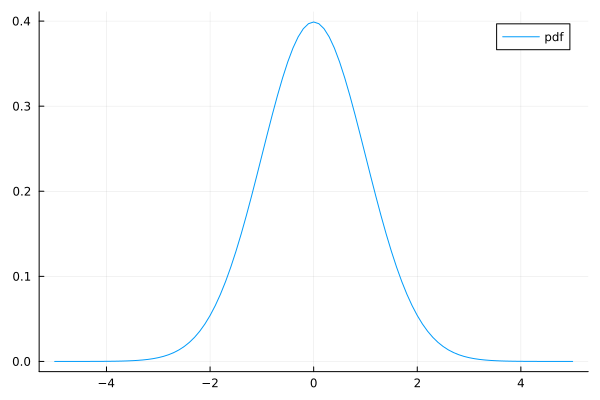

In [28]:
plot(-5:0.1:5, pdf.(dist, -5:0.1:5), label = "pdf")

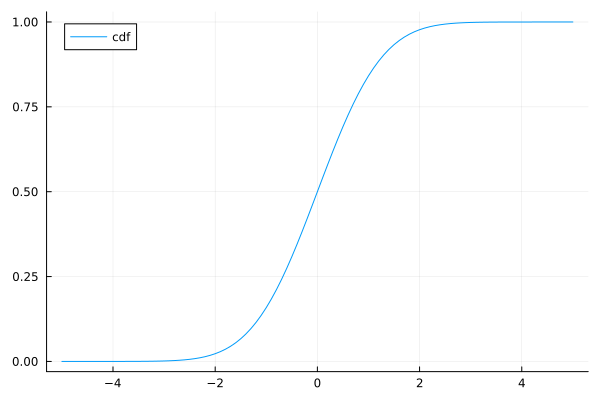

In [30]:
plot(-5:0.1:5, cdf.(dist, -5:0.1:5), label = "cdf")

In [34]:
@show quantile.(dist, [0.005, 0.025, 0.05, 0.95, 0.975, 0.995]) #these number should remind you of undergrad econometrics

6-element Vector{Float64}:
 -2.5758293035489053
 -1.9599639845400592
 -1.6448536269514724
  1.6448536269514717
  1.9599639845400576
  2.5758293035489053

With the `"Expectations"` package, you can obtain the expectations of some new random variables, say, transformed from the original distribution.

In [70]:
E = expectation(dist)
@show E(x -> x) # gives the mean

-4.052286867506662e-18

In [63]:
f = x -> x^2 # same as f(x) = x^2
@show expectation(f, dist) #alternatively E(x -> x^2)

expectation(f, dist) = 0.9999999999999988


0.9999999999999988

**Exercise:** implement the previous steps for some other distribution that you like (Gamma, Pareto, Frechet, etc.). Name the distribution `dist2`.

Check [here](https://juliastats.org/Distributions.jl) for the documentation of the distribution package.

**Exercise:** Simple Monte-Carlo with CLT

Let's test the [Central limit Theorem (CLT)](https://en.wikipedia.org/wiki/Central_limit_theorem) with sample means drawn from the distribution that you specified.

First, what are the mean and variance of the distribution you specified? From the CLT Theorem, what is the distribution of the sample mean $\bar{X_n}$ when $n \to \infty$?

From the distribution that you chose, write a function with two inputs `dist2` and $N$. The suggested algorithm is as follows:

1. create an array with zeros of size N.

2. start a for loop, let i go from 1 to N
   
3. within each iteration, draw a samples of size 1000 using `rand(dist2, N)`

4. within each iteration, compute the sample mean and store it in the array

5. return the array
   
Input N = 5, 15, 30, 100, 1000 and store the arrays. 

Next, use `fit(Normal, array_N)` on each of the arrays. It fits your sample of sample means with a normal distribution (usually using MLE). When $N$ goes larger, are the fits getting better? 

At last, first plot the theoretical distribution of the sample mean with label "theoretical distribution". Add the package `"KernelDensity"` and do `plot!(kde(array_N), label = "N = $N"` for all N with a for loop. `!` is added so that plots are done in a same graph. `$` let you use the variable value in a string. Are the simulated distributions getting closer to the theoretical distribution with $N$ getting larger?


## Question 2

**Exercise:** Simple Monte-Carlo with Linear regression (taken from Amil Petrin's Econometric class Homework)

*This requires some basic knowledge on OLS*.

The objective of a Monte Carlo simulation is to verify finite and large sample results. Given a model for how variables are determined, one can test the performance and properties of sample estimators by generating several samples drawn from the same population.
We will operate with the following model:
$$
y_i=\beta_0+x_i \beta_1+\epsilon_i
$$
where $y_i$ and $x_i$ are random variables. You observe $N$ samples of $i=1, \ldots, n$ observations of $y$ and $x$. You will estimate:
$$
y_i=\hat{\beta}_0+x_i \hat{\beta}_1+e_i
$$
You will have to execute a variety of simulations, changing sample sizes, number of samples, and assumptions.
1. First assume that the $\epsilon$ and the regressors are uncorrelated. Assume that both $X$ and $\epsilon$ are drawn from a normal distribution $\epsilon \sim N\left(0, \sigma_\epsilon^2\right)$, $X \sim N\left(\mu_x, \sigma_x^2\right)$. Start with a sample size $(n)$ of $n=100$ and define the number of samples to be simulated $(N)$ to be $N=100$ as well. You also need to define the true values of $\beta_0$ and $\beta_1$. Report the results that you find for the means and variance-covariance matrix of $\hat{\beta}_0, \hat{\beta}_1$. Finally, plot the distribution of the estimated parameters and the theoretical normal distribution that they are supposed to follow.
2. Now vary the sample size $n$ and redo 1) under the new values. Report and plot your results. Comment.
3. Now vary the number of samples $N$ and redo 1) under the new values. Report and plot your results. Comment.
4. Now vary the distribution of the $X$ and redo 1) under the new assumptions. Report and plot your results. Comment.
5. Now set the mean of the error $\epsilon$ to be different from zero and redo 1) under the new values. Comment.
6. Now draw the $\epsilon$ in such a way that it is in fact correlated with $X$ and redo 1) under the new assumptions. Report and plot your results. Comment.